# Pandas groupby() and Basic Aggregation

## This is a short (and basic) introduction to groupby() and basic aggregation in pandas.

In [ ]:
# some modules we will need
import pandas as pd
import numpy as np

## Let's do a quick introduction of the groupby() function

The pandas `groupby()` function allows you to perform aggregations on groups of your data. The function is typically used to aggregate conditionally on some row label or index. The function is (again) similar in usage to the SQL command `'group by'`.

A `groupby()` operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

#### The basic way to use the function is:

`out = dataframe.groupby(by=columnname).function()`

For example:

`df.groupby(by=["b"]).sum()`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

The syntax for the groupby function is fairly straightforward, as most usages simply use the 'by' parameter to designate which column values the data will be grouped on. The function takes the values within the designated column(s) and performs the grouping (and subsequent aggregation).

Under the covers, you can understand the groupby operation as on of split-apply-combine:

1. Split the data into the groups, depending on the specified key value,

2. Apply the aggregation function to each group,

3. Combine the groups back together into a single dataframe.

What `groupby()` on its own does is a dataframe-wide grouping of every APPLICABLE column of the passed-in function, using the "by" parameter that we set.

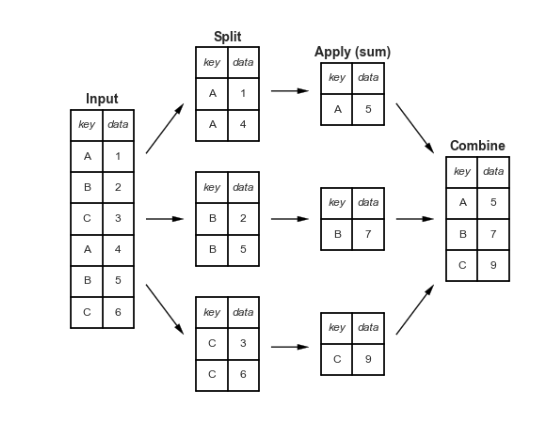

#### Because `groupby()` is commonly used in conjunction with aggregate functions, we will show examples below.

**VanderPlas has an excellent introduction to groupby in Chapter 3 of his book, available at the below links:**

https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb

We are only touching on the most basic topics, and VanderPlas goes into great detail through the remainder of this notebook from his book. We encourage you to use this supplemental material in your studies to learn about this function in greater detail.

## Aggregations in Pandas

Pandas supports the normal aggregate functions, such as min, max, mean, median, sum, etc. 

By default, aggregation and aggregate functions operate on the columns of the dataframe, or on the series.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html

#### Let's look at some basic examples, performing aggregations on Series objects, which are columns in dataframes.

In [ ]:
# for a series
rng = np.random.RandomState(42)  # set a random starting point
agg_series = pd.Series(rng.rand(5))
display(agg_series)

In [ ]:
# aggregate the entire column
display(agg_series.sum())
display(agg_series.mean())

#### Now let's look at aggregations on dataframes.

In [ ]:
# for a dataframe
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

If we don't specify an axis argument, the default is to perform the aggregation over the columns.

In [ ]:
# aggregate the entire column
df.mean()

By specifying the axis argument, you can instead aggregate within each row:

In [ ]:
display(df.sum(axis='columns'))
display(df.mean(axis='columns'))

Here is a listing of aggregates, and all of these operate on both dataframes and series objects. It would be good for you to remember these, and what each of them does. 

You can count on most of these appearing on exams in the course.

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

### In general, and in this class, we do aggregate functions on groupings of values within a column, using the `groupby()` function.

Here is a visual example, using `groupby()` and `mean`.

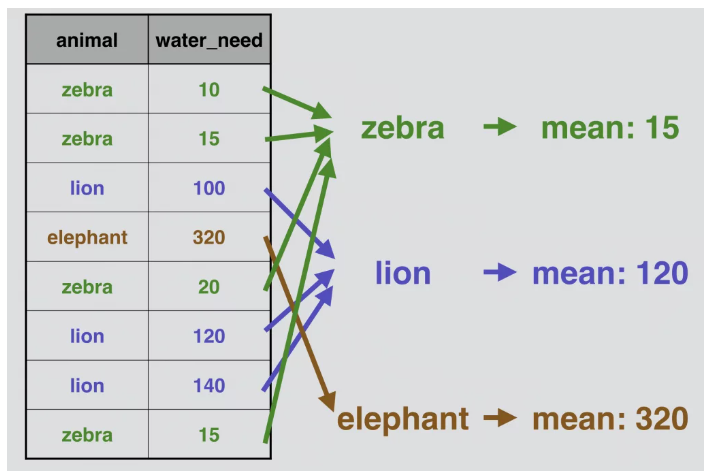

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

In [ ]:
# groupby and aggregate by a single column
display(df.groupby('key').sum())
display(df.groupby('key').mean())

#### What if we want to aggregate by multiple columns?

We can pass a `list` of the columns (that we want to aggregate by) to `groupby()`.

In [ ]:
df2 = pd.DataFrame({'key1': ['A', 'B', 'C', 'A', 'B', 'C','A', 'B', 'C', 'A', 'B', 'C'],
                    'key2': ['far', 'far', 'far', 'near', 'near', 'near','far', 'far', 'far', 'near', 'near', 'near'],
                   'data': range(12)}, columns=['key1', 'key2', 'data'])
df2

In [ ]:
# groupby and aggregate by multiple columns
display(df2.groupby(['key1','key2']).sum())
display(df2.groupby(['key1','key2']).sum())

#### Finally, there is a convenience method, describe(), that computes several common aggregates for each column and returns the result. This is good function when you are performing exploratory data analysis (EDA).

In [ ]:
df5 = pd.DataFrame({'A': rng.rand(10),
                   'B': rng.rand(10),
                   'C': rng.rand(10),
                   'D': rng.rand(10)})
df5

In [ ]:
df5.describe()

**This concludes our (basic) introduction to `groupby()` and `aggregation` in pandas.**

**We encourage you to delve deeper into them, as you will be using all of these throughout this class and professionally in working with Python for Analytics.**

**We also highly encourage you to work through NB7 Part1, the FEC Dataset notebook, as is does a full analysis of 'real life' data from the Federal Election Commission, including application of most of the above functions that we have covered here.**